# 1.  Basic optimization #

### 1a (10 points) Show step-by-step mathematical derivation for the gradient of the cost function $\ell(\theta)$ ###

### In logistic regression model,
### $p(y=1|x,\theta) = \frac{1}{1+exp(-\theta^Tx)}$ and $p(y=0|x,\theta) = 1 -\frac{1}{1+exp(-\theta^Tx)} = \frac{exp(-\theta^Tx))}{1+exp(-\theta^Tx)}$ ###
### Plugging these into a log likelihood function, $\ell(\theta): = log \prod_{i=1}^mP(y^i|x^i,\theta)$ ###
### $\ell(\theta) = \Sigma_{i=1}^Ny_ilog(p(x_i;\theta)+(1-y_i)log(1-p(x_i;\theta)))$ (multiplication becomes a sum) ###
### $=\Sigma_{i=1}^Ny_ilog(\frac{1}{1+exp(-\theta^Tx_i)})+(1-y_i)log(1-\frac{1}{1+exp(-\theta^Tx_i)})$ ###
### $=\Sigma_{i=1}^Ny_i(-1)(1+exp(-\theta^Tx_i))+(1-y_i)log(\frac{exp(-\theta^Tx_i)}{1+exp(-\theta^Tx_i)})$ ###
### $=\Sigma_{i=1}^N-y_i(1+exp(-\theta^Tx_i))+(1-y_i)[log(exp(-\theta^Tx_i))-log(1+exp(-\theta^Tx_i))]$ (log of a quotient is the difference of the logs) ###
### $=\Sigma_{i=1}^N-y_i(1+exp(-\theta^Tx_i))+(1-y_i)[(-\theta^Tx_i)-log(1+exp(-\theta^Tx_i))]$ (log of expoent cancelling to 1) ###
### $=\Sigma_{i=1}^N(y_i-1)\theta^Tx_i-log(1+exp(-\theta^Tx_i))$ ###
### This is the log-likelihood objective function we want to maximize. In order to find to maximizer, we need to satisfy the first order condition, which means this gradient needs to be zero at the maximizer. ### 
### Next, calculate the derivative of the log likelihood with respect to each $\theta$ ###
### $\frac{\partial}{\partial z}\sigma(z) = \sigma(z)[1-\sigma(z)]$ ###
### Since $\sigma(\theta^Tx) = \frac{1}{1+exp(-\theta^Tx)}$ ###
### $\frac{d}{d\theta}\sigma(\theta^Tx)=\frac{exp(-\theta x)x}{1+exp(-\theta^Tx)^2} = exp(-\theta^Tx)x[\sigma(\theta^Tx)]^2$ ###
### $=(1+exp(-\theta^Tx)-1)x[\sigma(\theta^Tx)]^2$ ###
### $=(\frac{1}{\sigma(\theta^Tx)}-1)x[\sigma(\theta^Tx)]^2$ ###
### $=([\sigma(\theta^Tx)]-[\sigma(\theta^Tx)]^2)x$ ###
### $=[\sigma(\theta^Tx)][1-[\sigma(\theta^Tx)]x$ ###
### Derivative of at log of one point, $\frac{\partial}{\partial\theta}ylog\sigma(\theta^Tx)+\frac{\partial}{\partial\theta}(1-y)log[1-\sigma(\theta^Tx)]$ ### 
### $=[\frac{y}{\sigma(\theta^Tx)}-\frac{1-y}{1-\sigma(\theta^Tx)}]\frac{\partial}{\partial\theta}\sigma(\theta^Tx)$ ###
### $=[\frac{y}{\sigma(\theta^Tx)}-\frac{1-y}{1-\sigma(\theta^Tx)}]\sigma(\theta^Tx)[1-\sigma(\theta^Tx)]x$ ###
### $=[\frac{y-\sigma(\theta^Tx)}{\sigma(\theta^Tx)[1-\sigma(\theta^Tx)]}]\sigma(\theta^Tx)[1-\sigma(\theta^Tx)]x$ ###
### $=[y-\sigma(\theta^Tx)]x$ ###



______________________

### 1b (10 points) Write a pseudo-code for performing gradient descent to find the optimizer $\theta*$. This is essentially what the training procedure does. (pseudo-code means you will write down the steps of the algorithm, not necessarily any specific programming language.) ###

### 1. In gradient descent, we first initialize parameter $\theta^0$, and learning rate $\gamma_t$ ###
### 2. Then calculate $\frac{\partial}{\partial\theta}\ell(\theta)$ at $t^{th}$ instance ###
### 3. Next multiply the result from above by learning rate $\gamma_t$ and subtract this from the previous $\theta^t$ ###
### 4. Repeat 2~3 until $|| \theta^{t+1} - \theta^{t} || > \epsilon $
### 5. Return the final weights ###

____________

### 1c (10 points) Write the pseudo-code for performing the stochastic gradient descent algorithm to solve the training of logistic regression problem (1). Please explain the difference between gradient descent and stochastic gradient descent for training logistic regression ###

### 1. At each iteration of stochastic gradient descent, random sample n without replacement a subset $S_t$ data point $(x_i,y_i), i \in S_t$  ###

### 2. Then calculate $\frac{\partial}{\partial\theta}\ell(\theta)$ at $t^{th}$ instance ### 

### 3. Next update $\theta^t$ by multiplying the result from above by $\gamma_t$ and subtracting it from the previous $\theta^t-1$ ###

### 4. In the next iteration with a decreased step size such as $O(\frac{1}{t})$ random sample from another $S_t$

### 4. Repeat 1~4 until $|| \theta^{t+1} - \theta^{t} || > \epsilon $

### 5. Return the final weights ###

### The difference of SGD vs. GD is that in SGD, before looping, need to random shuffle the training data. This is an intended behavior because this prevents us from calculating a dot product over entire training data to move a single step. However, SGD is much faster and gauranteed to perform as good as GD given the right step size. ###

________________

### 1d  (10 points) We will show that the training problem in basic logistic regression problem is concave. Derive the Hessian matrix of $\ell(\theta)$ and based on this, show the training problem (1) is concave (note that in this case, since we only have one feature, the Hessian matrix is just a scalar). Explain why the problem can be solved efficiently and gradient descent will achieve a unique global optimizer, as we discussed in class.

$Hessian\:\ell(\theta) = 
\begin{bmatrix}
\frac{\partial^2\ell(\theta)}{\partial\theta_1^2} \\
\frac{\partial^2\ell(\theta)}{\partial\theta_2\partial\theta_1} \\
\vdots \\
\frac{\partial^2\ell(\theta)}{\partial\theta_n\partial\theta_1} 
\end{bmatrix}$

### Starting with gradient of the likelihood function, $\frac{\partial\ell(\theta)}{\partial(\theta)}=\Sigma_i(y_i-1)x_i+\frac{exp(-\theta^T x_i)x_i}{1+exp(-\theta^T x_i)}$ ###
### $(y_i-1)x_i$ term drops because it is a derivative w.r.t. $\theta$ ###
### Using a quotient rule & chain rule ###
### $=\frac{(exp(-\theta^T x_i)x_i)'(exp(-\theta^T x_i)) - exp(-\theta^T x_i)x_i(exp(-\theta^T x_i))'}{[exp(-\theta^T x_i)]^2}$ ###
### $=\frac{(exp(-\theta^T x_i)x_i)(exp(-\theta^T x_i)) - exp(-\theta^T x_i)x_i(exp(-\theta^T x_i))}{[exp(-\theta^T x_i)]^2}$ ###
### $= -\dfrac{x_i\theta\mathrm{e}^{-x_i\theta}}{\mathrm{e}^{-x_i\theta}+1}+\dfrac{\mathrm{e}^{-x_i\theta}}{\mathrm{e}^{-x_i\theta}+1}+\dfrac{x_i\theta\mathrm{e}^{-2x_i\theta}}{\left(\mathrm{e}^{-x_i\theta}+1\right)^2}$ ###
### Because the Hessian matrix represents the 2nd derivatives, this being negative means 1st order derivative is decreasing, thus in the concave downwards interval. This works well with Gradient Descent/Ascent approach because the updated weights will decrease after each iteration ###

___________________________________________________________________

# 2.  Comparing Bayes, logistic, and KNN classifiers. (60 points) #

## In lectures, we learn three different classifiers. This question is to implement and compare them. Python users, please feel free to use Scikit-learn, which is a commonly-used and powerful Python library with various machine learning tools. But you can also use other similar libraries in other languages of your choice to perform the tasks ##

## Part One (Divorce classification/prediction). (30 points) ##

### Q2P1a (15 points) Report testing accuracy for each of the three classifiers. Comment on their performance: which performs the best and make a guess why they perform the best in this setting ###

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [71]:
df = pd.read_csv(".\\homework4\\marriage.csv", header=None)

In [85]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.560903,3.681587,3.450467,3.211998,-1.203045,0.597706,-0.970093,-0.750970,-0.511495,-0.133660,...,2.077401,1.184182,3.955069,2.608046,2.303629,1.721660,3.275018,1.761019,1.215237,1.0
1,4.153272,5.173858,4.100690,2.580173,3.305788,-1.505512,-0.029398,5.702657,2.230281,4.975496,...,3.467076,2.451984,3.504294,5.324240,4.480607,5.375248,2.270379,2.167944,2.191214,1.0
2,2.226241,1.575322,2.389117,2.725405,-0.304562,2.832803,1.787779,0.565755,1.328212,2.335353,...,1.200917,1.241794,2.207492,1.228034,0.870052,1.685040,2.341985,-0.444320,2.527452,1.0


In [266]:
#train test split
rs = 0 #random state
X = df.iloc[:, 0:len(df.columns)-1].values
y = df.iloc[:,-1:].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=rs)

#show shapes
for i in (X_train, X_test, y_train, y_test):
    display(i.shape)

(136, 54)

(34, 54)

(136, 1)

(34, 1)

LR: 0.942857 (0.069985)
KNN: 0.942857 (0.069985)
NB: 0.942857 (0.069985)


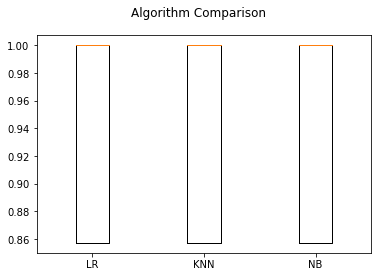

In [340]:
# Compare Algorithms
seed = 0
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB(priors = None, var_smoothing = 1e-03)))
#models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### As I vary seed for rng, I get slightly different results w.r.t. overall accuracy each run, but all 3 classifiers performed identically. Hypothesis for this phenomena is that the base data can be linearly separate very well. ###

_________________

### Q2P1b (15 points) Now perform PCA to project the data into two-dimensional space. Plot the data points and decision boundary of each classifier. Comment on the difference between the decision boundary for the three classifiers. Please clearly represent the data points with different labels using different colors ###

#### Splitting data first into the train and test set, fit PCA on the train set, then transform both the train and test on the fitted model. Applying PCA to the entire dataset before the train test split causes "data leakage" since the new basis vectors would now have information about the test set. ####

In [267]:
#train test split
rs = 0 #random state
X = df.iloc[:, 0:len(df.columns)-1].values
y = df.iloc[:,-1:].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=rs)

#show shapes
for i in (X_train, X_test, y_train, y_test):
    display(i.shape)
    
from sklearn.decomposition import PCA
X_train_reduced = PCA(n_components=2).fit(X_train).transform(X_train)
X_test_reduced = PCA(n_components=2).fit_transform(X_test)
display(X_train_reduced.shape)
display(X_test_reduced.shape)

(136, 54)

(34, 54)

(136, 1)

(34, 1)

(136, 2)

(34, 2)

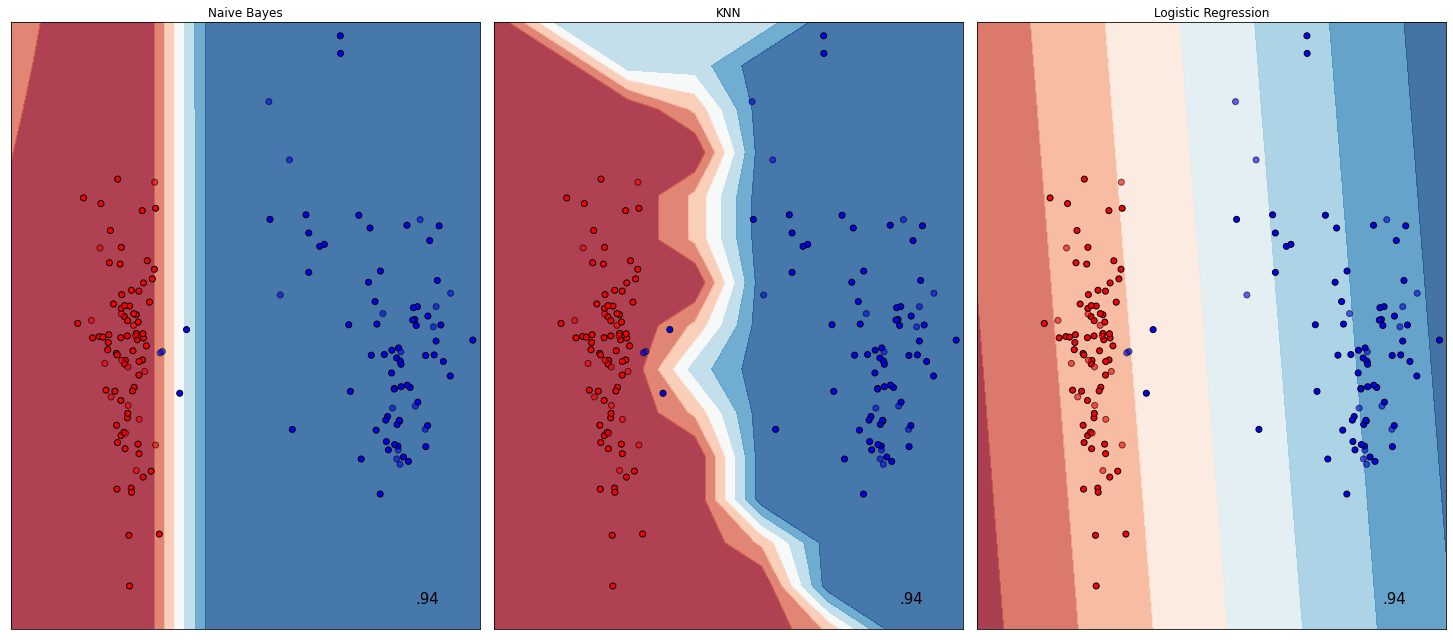

In [339]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .5  # step size in the mesh

names = ["Naive Bayes" , "KNN", "Logistic Regression"]

classifiers = [
    GaussianNB(priors = None, var_smoothing = 1e-03),
    KNeighborsClassifier(3),
    LogisticRegression()
    ]

figure = plt.figure(figsize=(27, 9))
i = 1

# iterate over datasets
#for ds_cnt, ds in enumerate(datasets):
# preprocess dataset, split into training and test part
#X, y = ds
#X = StandardScaler().fit_transform(X)
# X_train, X_test, y_train, y_test = \
#     train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X_train_reduced[:, 0].min() - .5, X_train_reduced[:, 0].max() + .5
y_min, y_max = X_train_reduced[:, 1].min() - .5, X_train_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# X_train_reduced
# X_test_reduced
# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train_reduced, y_train)
    score = clf.score(X_test_reduced, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z2 = [0.0 if item <= np.median(Z) else 1.0 for item in Z] #To achive only 2 unique levels based on values
        Z2 = np.array(Z2) 
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z2 = [0.0 if item <= np.median(Z) else 1.0 for item in Z] #To achive only 2 unique levels based on values
        Z2 = np.array(Z2) 
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    Z2 = Z2.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    #ax.contourf(xx, yy, Z2, colors=['green'], alpha=.8)

    # Plot the training points
    ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

### I attempted to produce only 1 classification boundary by forcing $Z$ into 0 or 1 (2 unique levels), but was not getting an expected result, so making observations based on the plots above as is. ###


### NB's decision boundaries appear to be almost linear in this case, but I do see some curvatures in especially in the outer contours. ###
### KNN's decision boundaries, follow similar patterns as proximities between each participants (clusters). With this being non-parametric approach, this makes sense ###
### LR's decision boundaries are strictly linear, and gradients (shown in different colors) move in monotonic direction ###

_________________

## Part Two (Handwritten digits classification). (30 points) ##

### Q2P2a (15 points) Report testing accuracy for each of the three classifiers. Comment on their performance: which performs the best and make a guess why they perform the best in this setting ###

In [421]:
from scipy.stats import multivariate_normal as mvn

data  = np.loadtxt(".\\homework4\\data.dat")
label = np.loadtxt(".\\homework4\\label.dat")

In [423]:
data = data.T

In [412]:
#data = data.reshape(data.shape[1], 28, 28, 1)
#data = data.reshape(data.shape[1], 28, 28)

In [425]:
display(data.shape)
display(label.shape)

(1990, 784)

(1990,)

In [426]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, label, test_size=0.2, random_state=rs)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(1592, 784)

(398, 784)

(1592,)

(398,)

In [427]:
#transform labels into 0 and 1
from sklearn import preprocessing
le = LabelEncoder()
le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

LR: 0.972373 (0.016756)
KNN: 0.987468 (0.013693)
NB: 0.947184 (0.016825)


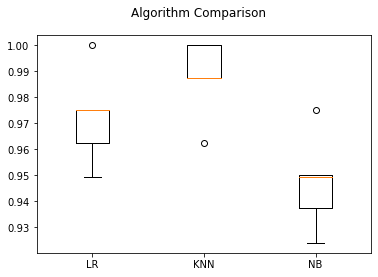

In [429]:
# Compare Algorithms
seed = 0
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB(priors = None, var_smoothing = 1e-03)))
#models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### Seems like KNN performed the best with good margins (vs. LR and NB), and this makes sense as input vectors are compressed images, and digits images can be thought of it as continous strokes of pixels across a plane, KNN with Eucledian performed the best ###

_________________

### Q2P2b (15 points) Now perform PCA to project the data into two-dimensional space. Plot the data points and decision boundary of each classifier. Comment on the difference between the decision boundary for the three classifiers. Please clearly represent the data points with different labels using different colors. ###

In [431]:
#Perform PCA(2)
X_train_reduced = PCA(n_components=2).fit(X_train).transform(X_train)
X_test_reduced = PCA(n_components=2).fit_transform(X_test)
display(X_train_reduced.shape)
display(X_test_reduced.shape)

(1592, 2)

(398, 2)

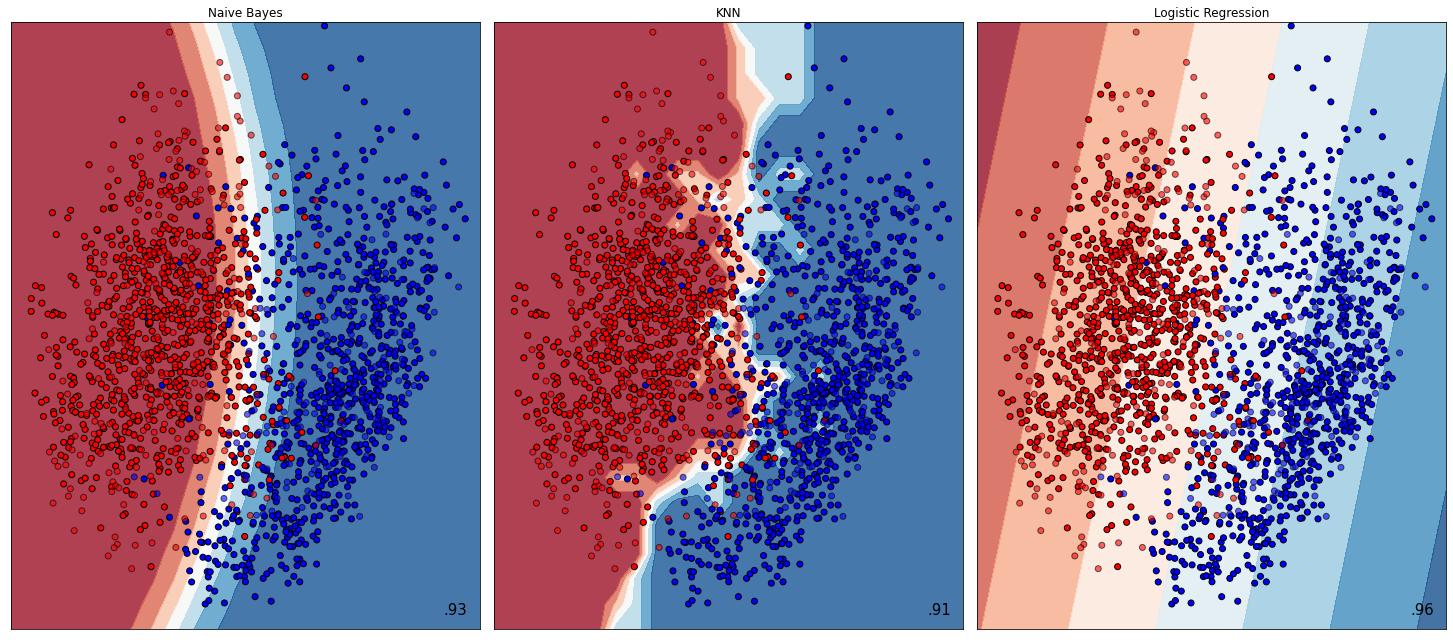

In [433]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .5  # step size in the mesh

names = ["Naive Bayes" , "KNN", "Logistic Regression"]

classifiers = [
    GaussianNB(priors = None, var_smoothing = 1e-03),
    KNeighborsClassifier(3),
    LogisticRegression()
    ]

figure = plt.figure(figsize=(27, 9))
i = 1

# iterate over datasets
#for ds_cnt, ds in enumerate(datasets):
# preprocess dataset, split into training and test part
#X, y = ds
#X = StandardScaler().fit_transform(X)
# X_train, X_test, y_train, y_test = \
#     train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X_train_reduced[:, 0].min() - .5, X_train_reduced[:, 0].max() + .5
y_min, y_max = X_train_reduced[:, 1].min() - .5, X_train_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# X_train_reduced
# X_test_reduced
# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train_reduced, y_train)
    score = clf.score(X_test_reduced, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z2 = [0.0 if item <= np.median(Z) else 1.0 for item in Z] #To achive only 2 unique levels based on values
        Z2 = np.array(Z2) 
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z2 = [0.0 if item <= np.median(Z) else 1.0 for item in Z] #To achive only 2 unique levels based on values
        Z2 = np.array(Z2) 
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    Z2 = Z2.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    #ax.contourf(xx, yy, Z2, colors=['green'], alpha=.8)

    # Plot the training points
    ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

### Similar situation with the above answer (for Q2P1b): I attempted to produce only 1 classification boundary by forcing $Z$ into 0 or 1 (2 unique levels), but was not getting an expected result, so making observations based on the plots above as is. ###


### NB's decision boundaries appear to have consistent curvatures and decreasing density near decision boundaries ###
### KNN's decision boundaries seem more complicated than NB's and appear to be formed based on magnitude of clusters ###
### LR's decision boundaries are strictly linear, and gradients (shown in different colors) move in monotonic direction, and this makes sense with classification confidence increase with increased likelihood value ###

__________________

# 3.  Naive Bayes for spam filtering. (15 points) #